In [3]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

In [4]:
iris=datasets.load_iris()
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [8]:
X=pd.DataFrame(iris.data,columns=iris.feature_names)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
X.drop(["sepal length (cm)","sepal width (cm)"],axis=1,inplace=True)
X.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [11]:
X.shape

(150, 2)

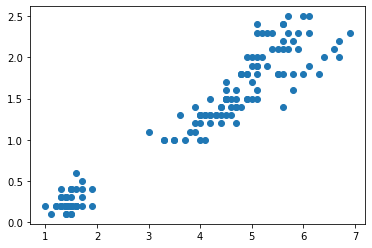

In [12]:
plt.scatter(X["petal length (cm)"],X["petal width (cm)"])

In [13]:
from sklearn.cluster import KMeans

In [14]:
wcss=[]
for i in range(1,11):
    kmc=KMeans(n_clusters=i)
    kmc.fit(X)
    wcss.append(kmc.inertia_)
wcss    

C:\Users\Sathwik\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[550.8953333333333,
 86.39021984551391,
 31.371358974358966,
 19.46598901098901,
 13.983213141025644,
 11.040239971910458,
 9.197417958598738,
 7.710246831913541,
 6.57117684766214,
 5.551913395641016]

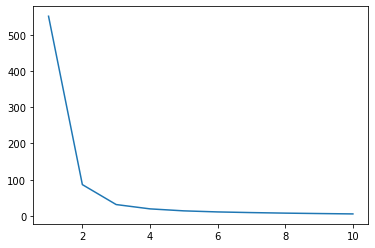

In [15]:
plt.plot(range(1,11),wcss)

In [16]:
fkmc=KMeans(3)
fkmc.fit(X)
y_fkmc=fkmc.fit_predict(X)
y_fkmc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [18]:
X["cluster"]=y_fkmc
X.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [19]:
df1=X[X.cluster==0]
df2=X[X.cluster==1]
df3=X[X.cluster==2]

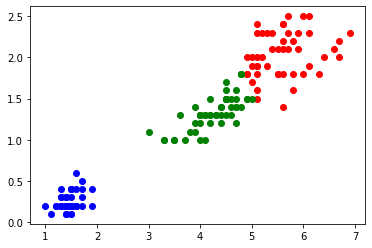

In [22]:
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"],color="red")
plt.scatter(df2["petal length (cm)"],df2["petal width (cm)"],color="blue")
plt.scatter(df3["petal length (cm)"],df3["petal width (cm)"],color="green")

In [24]:
centroid=fkmc.cluster_centers_

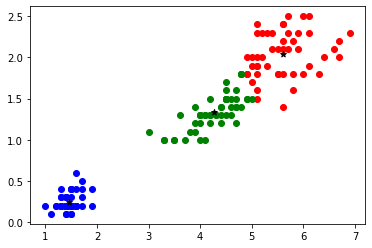

In [29]:
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"],color="red")
plt.scatter(df2["petal length (cm)"],df2["petal width (cm)"],color="blue")
plt.scatter(df3["petal length (cm)"],df3["petal width (cm)"],color="green")
plt.scatter(centroid[:,0],centroid[:,1],color="black",marker="*")